In [1]:
import h5py
import CCAugmentation as cca
from CCAugmentation import transformations as tf
from CCAugmentation import outputs as out
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as CM
import cv2
import scipy.io as sio
from tqdm import tqdm
import PIL.Image


In [22]:
train_data_pipeline = cca.Pipeline(
    cca.examples.loading.SHHLoader("data\\ShanghaiTech", "train", "A"),
    [
        tf.Crop(None, None, 1/4, 1/4)
    ]
)

generator = train_data_pipeline.execute_generate()
# you can also use execute_generate() to create a generator

In [15]:
# images, density_maps = next(gen)
# print(images)

In [23]:
cnt = 301
for image, density_map in tqdm(generator):
    path = os.path.join("data\\train_data\\images", f"IMG_{str(cnt)}.jpg")
    cv2.imwrite(path, image)
    
    path = os.path.join("data\\train_data\\ground", f"IMG_{str(cnt)}.h5")
    with h5py.File(path, 'w') as hf:
        hf['density'] = density_map
    
    cnt += 1

300it [00:10, 28.78it/s]


Sum =  72.06488395768662
data\train_data\images\IMG_337.jpg


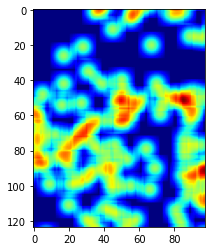

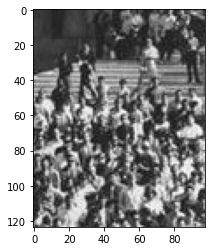

In [24]:
plt.figure()
#Ground Truth
path = "data\\train_data\\ground\\IMG_337.h5"
gt_file = h5py.File(path,'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)
print("Sum = " ,np.sum(groundtruth))
gt_file.close()
plt.figure()
# Image corresponding to the ground truth
img = PIL.Image.open(path.replace('.h5','.jpg').replace('ground','images'))
plt.imshow(img)
print(path.replace('.h5','.jpg').replace('ground','images'))
img.close()

Sum =  33.2613671655415
data\train_data\images\IMG_303.jpg


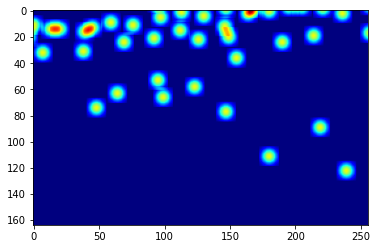

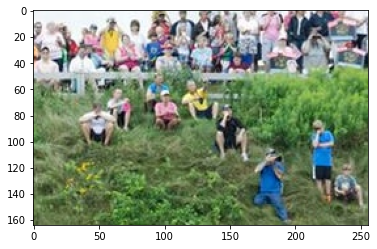

In [26]:
plt.figure()
#Ground Truth
path = "data\\train_data\\ground\\IMG_303.h5"
gt_file = h5py.File(path,'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)
print("Sum = " ,np.sum(groundtruth))
gt_file.close()

plt.figure()
# Image corresponding to the ground truth
img = PIL.Image.open(path.replace('.h5','.jpg').replace('ground','images'))
plt.imshow(img)
print(path.replace('.h5','.jpg').replace('ground','images'))
img.close()